In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('MobileDataSet.csv')
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [5]:
df.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [6]:
df.isna().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

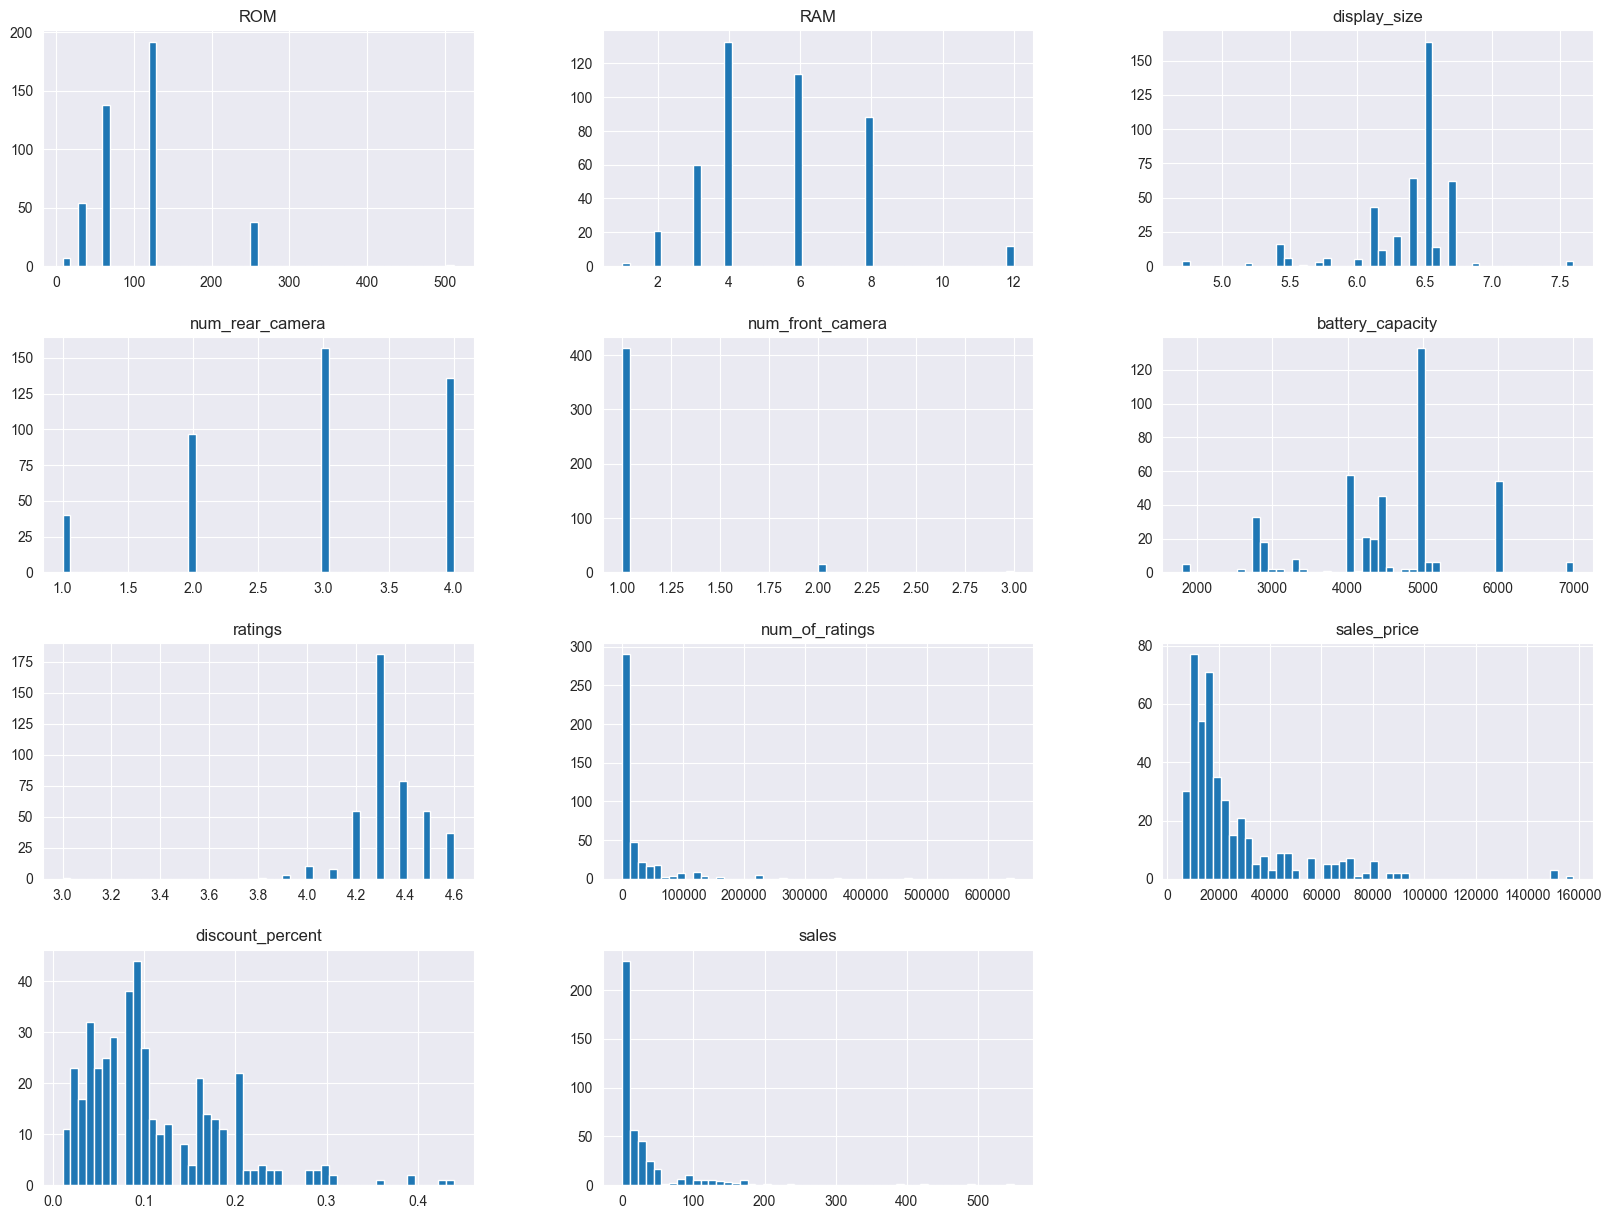

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

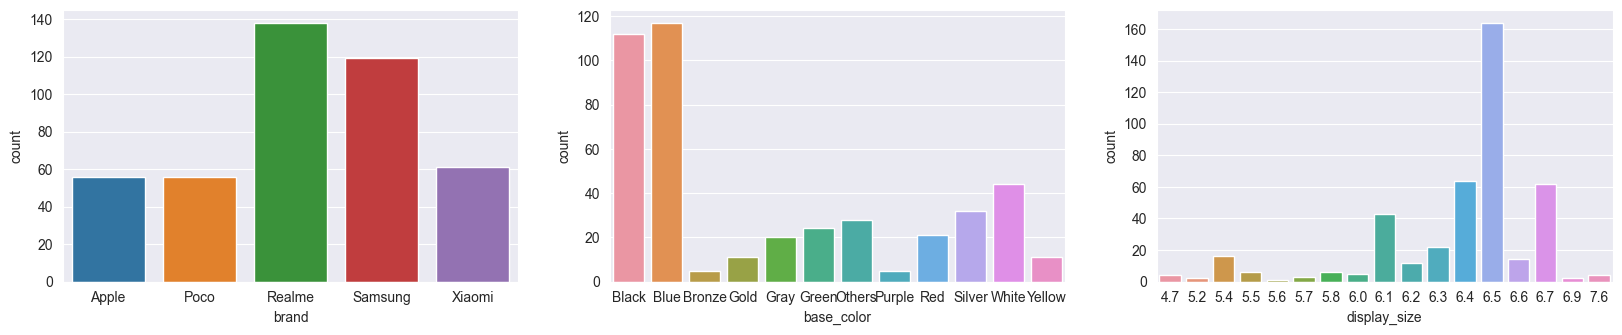

In [8]:
data_cat = ['brand', 'base_color', 'display_size']
i = 1
plt.figure(figsize=(20, 12))
for c in data_cat:
    plt.subplot(3, 3, i)
    sns.countplot(x=df[c].sort_values())
    i += 1

In [9]:
brand_encoder = LabelEncoder()
df['brand'] = brand_encoder.fit_transform(df['brand'])
color_encoder = LabelEncoder()
df['base_color'] = color_encoder.fit_transform(df['base_color'])
processor_encoder = LabelEncoder()
df['processor'] = processor_encoder.fit_transform(df['processor'])
screen_encoder = LabelEncoder()
df['screen_size'] = screen_encoder.fit_transform(df['screen_size'])
df = df[['brand', 'base_color', 'processor', 'screen_size', 'ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera', 'battery_capacity', 'sales_price', 'sales']]
df.head()

,brand,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,sales_price,sales
0,0,0,5,4,64,2,4.7,1,1,1800,32999,127.52
1,0,8,0,2,64,4,5.4,2,1,2815,57149,1.39
2,0,8,5,4,64,2,4.7,1,1,1800,32999,127.52
3,0,6,6,1,64,3,6.1,1,1,2942,42999,23.07
4,0,8,0,1,128,4,6.1,2,1,2815,69149,5.15


<Axes: >

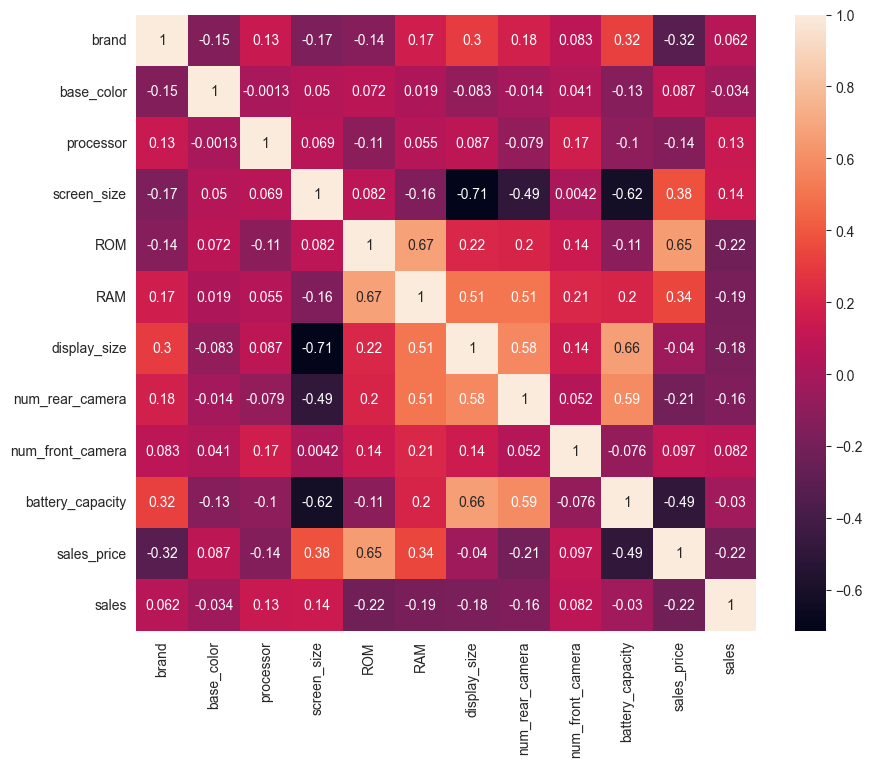

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

In [11]:
X = df.drop(['sales_price'], axis=1)
y = df['sales_price']

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.head()

,brand,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,sales
106,1,4,4,0,128,6,6.7,4,1,6000,45.48
92,1,9,2,0,256,8,6.7,3,1,5065,3.23
66,1,0,4,0,64,4,6.5,3,1,6000,5.16
204,2,10,2,0,64,4,6.5,4,1,4300,78.02
23,0,10,0,1,64,4,6.1,2,1,2815,4.78


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [15]:
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    fig = plt.figure()
    plt.scatter(y_test, y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)
    plt.xlabel('y_test', fontsize=18)
    plt.ylabel('y_pred', fontsize=16)

MAE : 9511.94608034416
MSE : 258405247.94595534
RMSE: 16074.988272031658


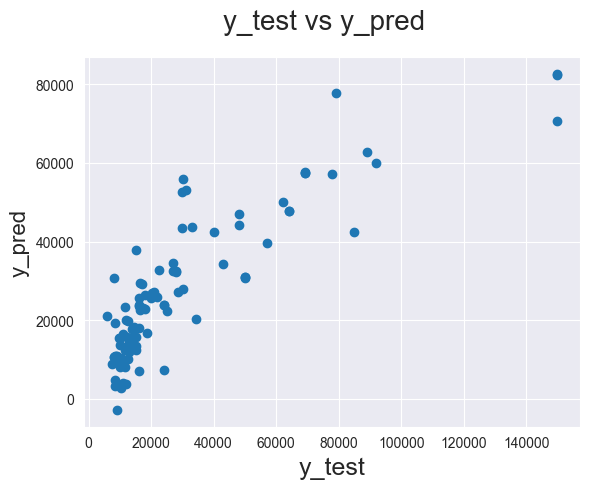

In [16]:
model_1 = LinearRegression()
run_experiment(model_1)

MAE : 3477.8425925925926
MSE : 129157705.73148148
RMSE: 11364.757178729402


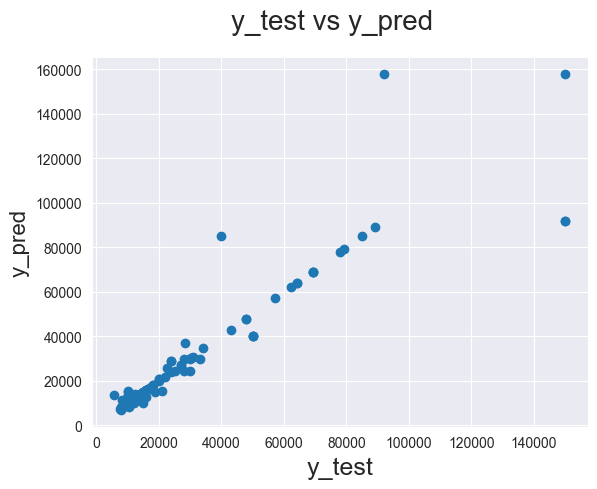

In [17]:
model_2 = DecisionTreeRegressor(random_state=1)
run_experiment(model_2)

MAE : 13192.120991369942
MSE : 420220805.4111523
RMSE: 20499.28792449026


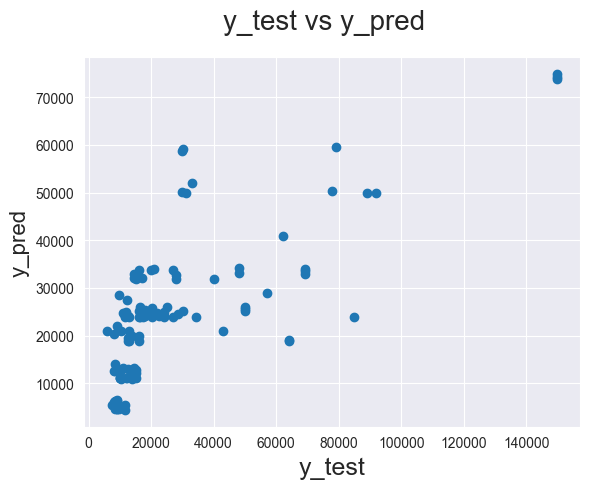

In [18]:
model_3 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_3)

MAE : 9613.0823514479
MSE : 270926972.8658401
RMSE: 16459.859442469125


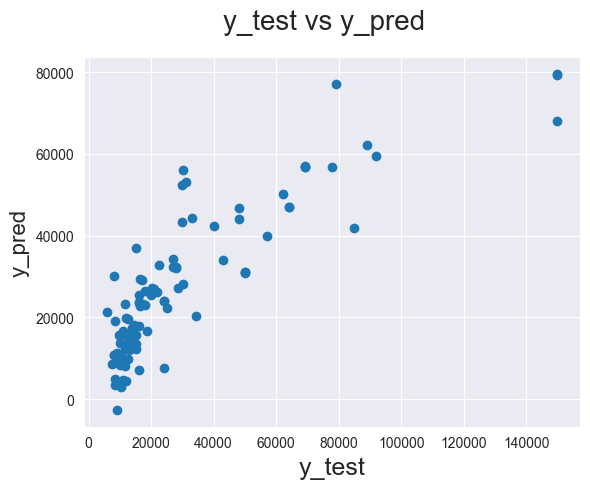

In [19]:
model_4 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_4)

MAE : 4526.938173597236
MSE : 149915990.85301366
RMSE: 12244.018574512767


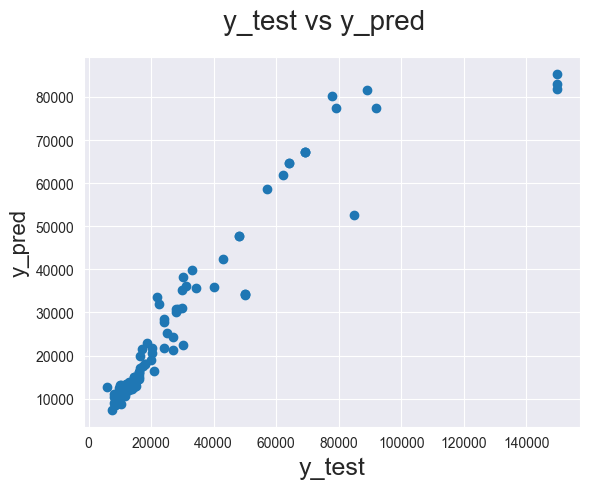

In [20]:
model_5 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_5)

In [21]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 15, 20],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

In [24]:
rfc = RandomForestRegressor(random_state=1)

In [25]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2)
res = CV_rfc.fit(X_train_scaled, y_train)
res, CV_rfc.best_params_

(GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=1),
              param_grid={'criterion': ['squared_error', 'absolute_error',
                                        'friedman_mse'],
                          'max_depth': [10, 15, 20],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 500, 1000]}),
 {'criterion': 'absolute_error',
  'max_depth': 15,
  'max_features': 'sqrt',
  'n_estimators': 1000})

In [26]:
CV_rfc.best_params_

{'criterion': 'absolute_error',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 1000}

MAE : 5905.872254629629
MSE : 274527999.4530268
RMSE: 16568.886488024076


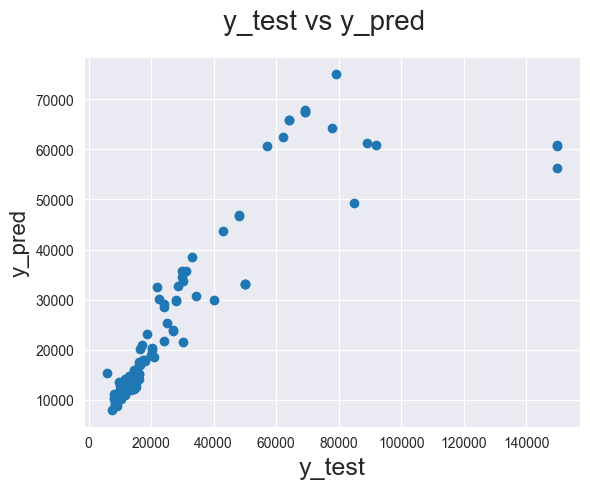

In [27]:
final_model = RandomForestRegressor(n_estimators=1000, max_features='sqrt', max_depth=15, min_samples_leaf=3,
                                    random_state=1, criterion='absolute_error')
run_experiment(final_model)